In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
si = SentimentIntensityAnalyzer()
def check_sentiment(message):
    if type(message)== str:
        sentiment = si.polarity_scores(message)
        if 0 <= sentiment['compound'] <= 0.3: 
            return 'Neutral'
        elif sentiment['compound'] >=0.3:
            return 'Positive'
        else:
            return 'Negative'

In [4]:
product=['iPhone 8', 'iPhone XR', 'iPhone 11', 'iPhone 11pro']

In [5]:
def add_product(n):
    random = np.random.randint(0,len(product))
    return product[random]

In [6]:
yelp = pd.read_csv('yelp.csv')

In [7]:
yelp['product'] = yelp['stars'].apply(add_product)

In [8]:
yelp = yelp[['stars', 'text','product']]

In [9]:
yelp.head()

,stars,text,product
0,5,My wife took me here on my birthday for breakf...,iPhone 11
1,5,I have no idea why some people give bad review...,iPhone 8
2,4,love the gyro plate. Rice is so good and I als...,iPhone 11pro
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",iPhone 8
4,5,General Manager Scott Petello is a good egg!!!...,iPhone 11


In [10]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
stars      10000 non-null int64
text       10000 non-null object
product    10000 non-null object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [11]:
yelp.head()

,stars,text,product
0,5,My wife took me here on my birthday for breakf...,iPhone 11
1,5,I have no idea why some people give bad review...,iPhone 8
2,4,love the gyro plate. Rice is so good and I als...,iPhone 11pro
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",iPhone 8
4,5,General Manager Scott Petello is a good egg!!!...,iPhone 11


In [12]:
yelp['prediction'] = yelp['text'].apply(check_sentiment)

In [13]:
def show_report(prod):
    print('Product',prod)
    apple_prod = yelp[yelp['product']==prod]
    sns.countplot(apple_prod['prediction'])

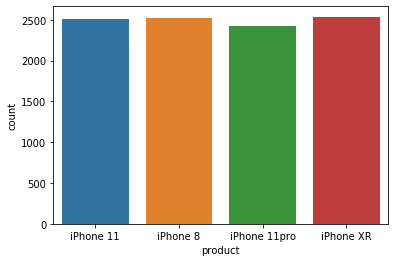

In [14]:
sns.countplot(yelp['product'])

Product iPhone 11


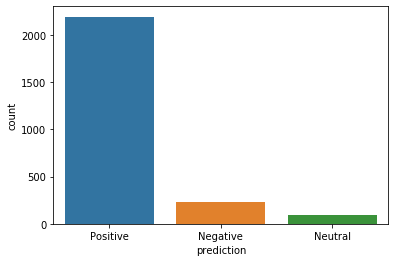

In [15]:
show_report('iPhone 11')

Product iPhone 8


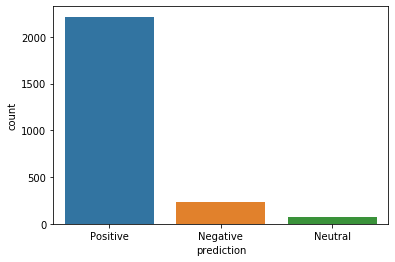

In [16]:
show_report('iPhone 8')

Product iPhone 11pro


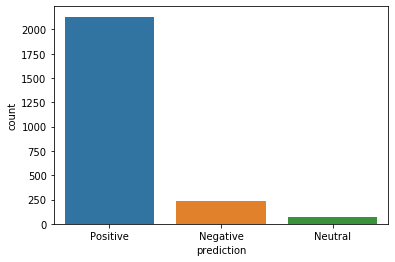

In [17]:
show_report('iPhone 11pro')

In [6]:
check_sentiment("I don't hate this product")

'Positive'